In [49]:
!ls


2019-07-08.csv                 fastai_gcp.rtf
BigQuery_LondonCrimes          local plotly test.ipynb
Cat feeder.ipynb               mictosoftcompetition notes.rtf
Weight.csv                     pi-iot-project.json
Weight2019_07_12.csv           temp-plot.html
connect.ssh                    training-data-analyst
create long term file....ipynb


In [50]:
import os
import pandas as pd
from pandas.io import gbq
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "pi-iot-project.json"

# Instantiates a client
bigquery_client = bigquery.Client()

In [51]:
bigquery_client

In [52]:
#!conda install -c conda-forge pandas-gbq -y

In [53]:
query = '''
SELECT * FROM `pi-iot-project-235918.home.sensors` 
where sensor = "Weight"
order by time desc 
'''
# LIMIT 200

In [54]:
df = gbq.read_gbq(query, dialect='standard' );

In [55]:
df.head()

,device,time,sensor,val,extra
0,catfeeder,2019-07-18 10:15:00,Weight,12.0,None
1,catfeeder,2019-07-18 10:09:38,Weight,12.0,None
2,catfeeder,2019-07-18 10:04:19,Weight,12.0,None
3,catfeeder,2019-07-18 09:58:58,Weight,12.0,None
4,catfeeder,2019-07-18 09:53:35,Weight,12.0,None


In [57]:
# Save the df
df.to_csv('Weight2019_07_18.csv', index=False)

### For Offline access

In [2]:
df=pd.read_csv('Weight.csv')

In [58]:
df.head()

,device,time,sensor,val,extra
0,catfeeder,2019-07-18 10:15:00,Weight,12.0,None
1,catfeeder,2019-07-18 10:09:38,Weight,12.0,None
2,catfeeder,2019-07-18 10:04:19,Weight,12.0,None
3,catfeeder,2019-07-18 09:58:58,Weight,12.0,None
4,catfeeder,2019-07-18 09:53:35,Weight,12.0,None


In [59]:
Weight=df[df['sensor'] == 'Weight']
Weight=Weight[['time','val']]
Weight['time'] = Weight['time'].astype(str)

Weight=Weight[Weight.time > '2019-06-01']
# Weight val cleaning

Weight=Weight[Weight.val > 0]
Weight=Weight[Weight.val < 200]


In [60]:
Weight['Day']=Weight['time'].str[:10]
Weight['Hour']=Weight['time'].str[10:]              

In [61]:
Weight['Day'].min()

'2019-06-01'

In [62]:
Days=list(set(Weight['Day']))

In [63]:
Days


['2019-07-06',
 '2019-06-03',
 '2019-07-07',
 '2019-06-26',
 '2019-06-16',
 '2019-06-05',
 '2019-07-17',
 '2019-07-05',
 '2019-07-09',
 '2019-06-28',
 '2019-07-12',
 '2019-06-13',
 '2019-06-30',
 '2019-06-24',
 '2019-07-03',
 '2019-06-14',
 '2019-06-11',
 '2019-07-15',
 '2019-06-12',
 '2019-07-11',
 '2019-07-14',
 '2019-06-09',
 '2019-06-15',
 '2019-07-10',
 '2019-06-02',
 '2019-07-16',
 '2019-07-02',
 '2019-06-01',
 '2019-07-18',
 '2019-07-08',
 '2019-06-27',
 '2019-07-01',
 '2019-06-06',
 '2019-07-13',
 '2019-06-04',
 '2019-06-29',
 '2019-06-08',
 '2019-06-07',
 '2019-06-25',
 '2019-06-10',
 '2019-07-04']

### Creating new Dataframe

In [64]:
# Converting function!!

columns="time,val,Day,Hour,delta,eaten,given,eaten_cum_Day,given_cum_Day".split(',')

improved = pd.DataFrame(columns=columns)
for day in Days:
    print(day)
    temp=Weight.copy(deep=True)

    temp=Weight[temp.Day == day]
    temp = temp.sort_values(['time'])
    
    temp['delta']=0
    temp['eaten']=0
    temp['given']=0

    for i in range(1, len(temp)):
        value = temp['val'].iloc[i] - temp['val'].iloc[i-1]
        temp['delta'].iloc[i]=value
        if value < 0:
            temp['eaten'].iloc[i]= value * (-1)
        if value > 0:
            temp['given'].iloc[i]= value 
            
    
    temp['eaten_cum_Day']=temp['eaten']
    temp['given_cum_Day']=temp['given']

    for i in range(1, len(temp)):

        value = temp['eaten_cum_Day'].iloc[i-1] + temp['eaten_cum_Day'].iloc[i]
        temp['eaten_cum_Day'].iloc[i]=value

        value = temp['given_cum_Day'].iloc[i-1] + temp['given_cum_Day'].iloc[i]
        temp['given_cum_Day'].iloc[i]=value
    
    
    improved=improved.append(temp)

    

2019-07-06


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-03


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-07


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-26


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-16


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-05


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-17


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-05


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-09


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-28


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-12


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-13


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-30


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-24


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-03


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-14


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-11


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-15


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-12


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-11


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-14


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-09


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-15


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-10


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-02


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-16


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-02


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-01


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-18


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-08


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-27


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-01


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-06


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-13


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-04


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-29


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-08


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-07


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-25


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-10


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-04


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
improved.head()

,time,val,Day,Hour,delta,eaten,given,eaten_cum_Day,given_cum_Day
2589,2019-07-06 00:02:33,3.0,2019-07-06,00:02:33,0.0,0.0,0.0,0.0,0.0
2588,2019-07-06 00:08:03,3.0,2019-07-06,00:08:03,0.0,0.0,0.0,0.0,0.0
2587,2019-07-06 00:13:22,3.0,2019-07-06,00:13:22,0.0,0.0,0.0,0.0,0.0
2586,2019-07-06 00:18:41,3.0,2019-07-06,00:18:41,0.0,0.0,0.0,0.0,0.0
2585,2019-07-06 00:24:04,3.0,2019-07-06,00:24:04,0.0,0.0,0.0,0.0,0.0


In [66]:
improved.to_csv('improved.csv', index=False)

In [24]:
day="2019-07-08"
temp=Weight.copy(deep=True)

temp=Weight[temp.Day == day]
temp = temp.sort_values(['time'])

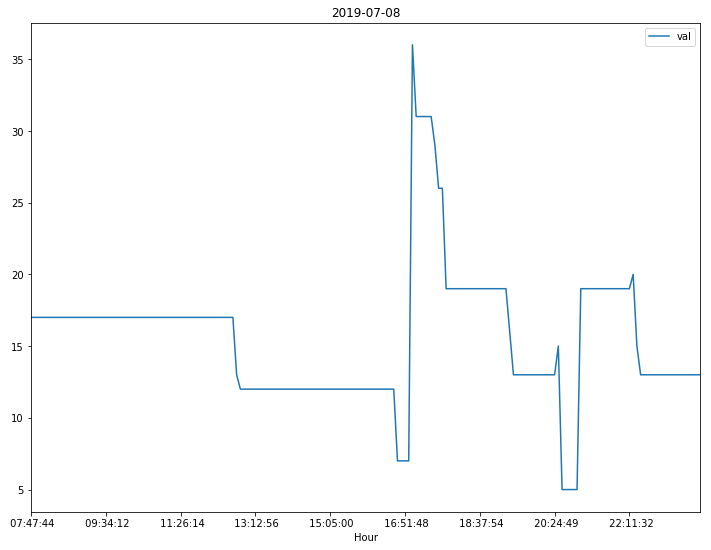

In [25]:
#  The day Weight changes
temp.plot(title=day, x='Hour', y='val',figsize=(12,9))

In [26]:
#real delta function...

temp['delta']=0
temp['eaten']=0
temp['given']=0

for i in range(1, len(temp)):
    value = temp['val'].iloc[i] - temp['val'].iloc[i-1]
    temp['delta'].iloc[i]=value
    if value < 0:
        temp['eaten'].iloc[i]= value * (-1)
    if value > 0:
        temp['given'].iloc[i]= value  
    

/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


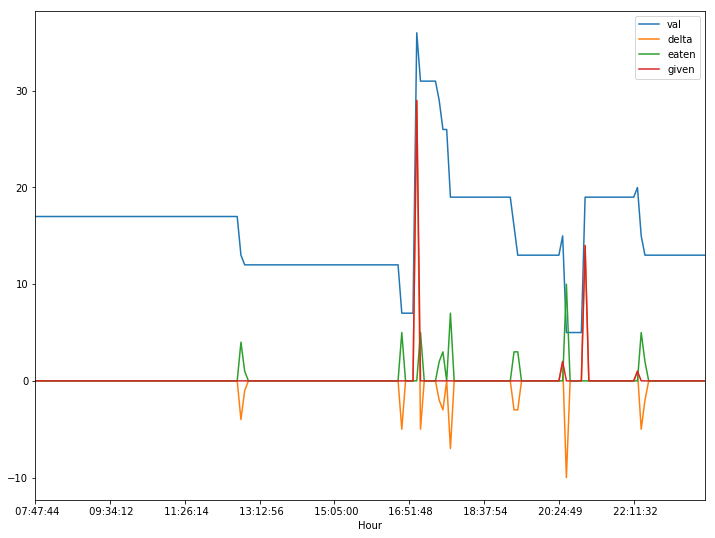

In [27]:
#  The day Weight changes
temp.plot(x='Hour', y=['val','delta','eaten','given'],figsize=(12,9))

In [29]:
temp['eaten_cum_Day']=temp['eaten']
temp['given_cum_Day']=temp['given']

for i in range(1, len(temp)):
    
    value = temp['eaten_cum_Day'].iloc[i-1] + temp['eaten_cum_Day'].iloc[i]
    temp['eaten_cum_Day'].iloc[i]=value
    
    value = temp['given_cum_Day'].iloc[i-1] + temp['given_cum_Day'].iloc[i]
    temp['given_cum_Day'].iloc[i]=value

    

temp.plot(x='Hour', y=['eaten_cum_Day','given_cum_Day'],figsize=(12,9))

In [40]:
improved=improved.append(temp)

In [1]:
improved.shape

NameError: name 'improved' is not defined

## Data quality Dataset.

In [9]:
Weight.head()

,time,val,Day,Hour
0,2019-07-09 15:04:24,17.0,2019-07-09,15:04:24
1,2019-07-09 14:59:02,17.0,2019-07-09,14:59:02
2,2019-07-09 14:53:46,17.0,2019-07-09,14:53:46
3,2019-07-09 14:48:25,17.0,2019-07-09,14:48:25
4,2019-07-09 14:42:58,17.0,2019-07-09,14:42:58


In [42]:
#daily frequency
interval_min=5 # minutes between measurements
total_measure_daily = 60*24/interval_min

Dataquality=pd.DataFrame({'Count': Weight.groupby('Day')['Hour'].count(),
                      'Massimo': Weight.groupby('Day')['Hour'].max(),
                      'Minimo': Weight.groupby('Day')['Hour'].min(),
                      'CoverRatio': Weight.groupby('Day')['Hour'].count() / total_measure_daily
                     })
#Dataquality['Day']=Dataquality.index
Dataquality = Dataquality.reset_index()

In [43]:
Dataquality.head()

,Day,Count,Massimo,Minimo,CoverRatio
0,2019-06-01,170,23:06:08,08:03:29,0.590278
1,2019-06-02,181,23:48:14,07:42:47,0.628472
2,2019-06-03,196,23:58:11,06:33:12,0.680556
3,2019-06-04,259,22:59:23,00:03:27,0.899306
4,2019-06-05,182,23:26:10,07:20:58,0.631944


In [45]:
date="2019-06-01"
EntryNumber = Dataquality[Dataquality.Day == date]
EntryNumber = EntryNumber['Count']
EntryNumber

0    170
Name: Count, dtype: int64

In [48]:
EntryNumber.iloc[0]

170

In [71]:
interval_min=5.30 # minutes between measurements
total_measure_daily = 60*24/interval_min
total_measure_daily

271.6981132075472